<a href="https://colab.research.google.com/github/jhalak999/MNIST-Digit-classification-using-NN/blob/main/digit_class_neural_nw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten digit classification using Neural Network**

In [1]:
#importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST dataset from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60000 images
test data = 10000 images

------

image dimension = 28 x 28
grayscale image => 1 channel

In [5]:
#printing the 11th image from xtrain
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
X_train[10].shape

(28, 28)

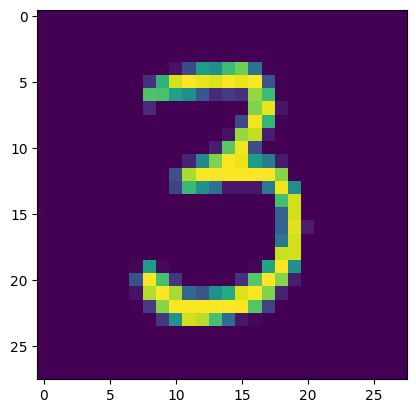

3


In [7]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(y_train[50])

Image Labels

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can apply one hot encoding

all the images have the same dimension in the dataset. If not, we have to resize the images to a common dimension

In [10]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
#printing the 11th image from xtrain
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [13]:
#setting up layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#compiling the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#training
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8542 - loss: 0.5087
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9550 - loss: 0.1519
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9670 - loss: 0.1076
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9740 - loss: 0.0845
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9794 - loss: 0.0677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0559
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0474
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9881 - loss: 0.0405
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0340
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0312


training data accuracy = 99.09%

**accuracy on test data :**

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1324
0.9732000231742859


test data accuracy = 96.99%

In [19]:
print(X_test.shape)

(10000, 28, 28)


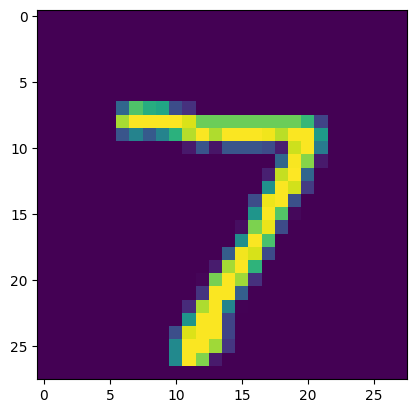

In [20]:
#first data point in x_test
plt.imshow(X_test[0])
plt.show()

In [23]:
print(y_test[0])

7


In [24]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
print(y_pred.shape)

(10000, 10)


In [26]:
print(y_pred[0])

[6.5597815e-05 4.1745332e-04 2.2904655e-01 9.5555156e-01 1.4023277e-05
 6.1935759e-01 1.8363384e-13 9.9999946e-01 1.7415896e-01 9.8886472e-01]


model.predict() gives the probability for each class for that particular data point

In [27]:
#converting prediction prob to class labels
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [28]:
#converting prediction prob to class labels for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [29]:
print(y_pred)

[[6.55978147e-05 4.17453324e-04 2.29046553e-01 ... 9.99999464e-01
  1.74158961e-01 9.88864720e-01]
 [8.34349275e-01 8.59383285e-01 1.00000000e+00 ... 1.14458238e-08
  9.62253213e-01 2.47274562e-11]
 [1.35550825e-02 9.99335945e-01 1.55452758e-01 ... 6.10286236e-01
  1.78986818e-01 3.05629754e-03]
 ...
 [3.41757556e-08 7.98404827e-08 1.44834864e-08 ... 2.74062399e-02
  2.64807115e-03 8.78724694e-01]
 [1.23110204e-03 1.25475715e-11 7.36255990e-09 ... 3.28741550e-08
  9.28019285e-01 7.57880189e-05]
 [9.06264468e-05 2.07701328e-10 1.09966604e-05 ... 6.16270956e-03
  7.11409768e-07 3.00902911e-08]]


y_test ==> true labels


y_pred_labels ==> predicted labels

Confusion matrix

In [30]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 960    0    0    2    3    1    6    3    2    3]
 [   1 1121    2    3    1    1    2    2    2    0]
 [  10    2  991    6    3    0    3    9    6    2]
 [   0    0    3  990    0    5    0    3    4    5]
 [   1    0    2    0  960    0    2    4    2   11]
 [   2    0    0   12    2  862    5    0    6    3]
 [   4    1    0    1    6    5  939    1    1    0]
 [   0    1    6    4    3    0    0  993    2   19]
 [   6    1    1    5    6    4    3    1  941    6]
 [   3    2    0    1   18    3    1    2    4  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

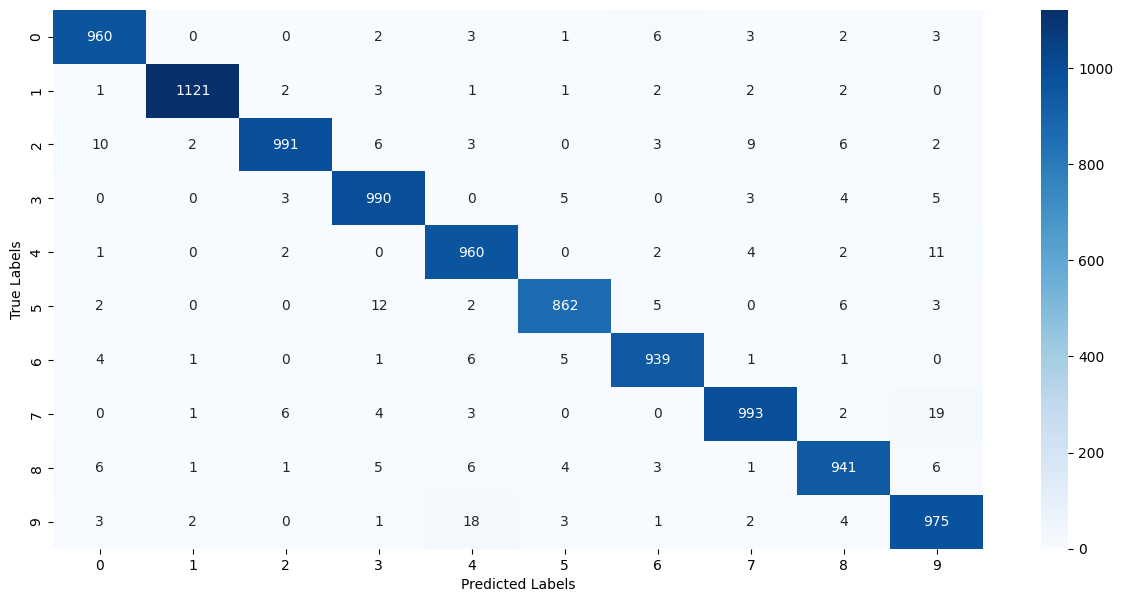

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

building a perdictive system

In [36]:
input_image_path = '/content/mnist_digit.png'
input_image = cv2.imread(input_image_path)

In [37]:
type(input_image)

numpy.ndarray

In [38]:
print(input_image)

[[[17 17 17]
  [11 11 11]
  [10 10 10]
  ...
  [10 10 10]
  [18 18 18]
  [55 55 55]]

 [[ 9  9  9]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 2  2  2]
  [11 11 11]
  [52 52 52]]

 [[ 8  8  8]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [10 10 10]
  [51 51 51]]

 ...

 [[ 8  8  8]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [10 10 10]
  [51 51 51]]

 [[ 9  9  9]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 2  2  2]
  [11 11 11]
  [51 51 51]]

 [[ 9  9  9]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [11 11 11]
  [51 51 51]]]


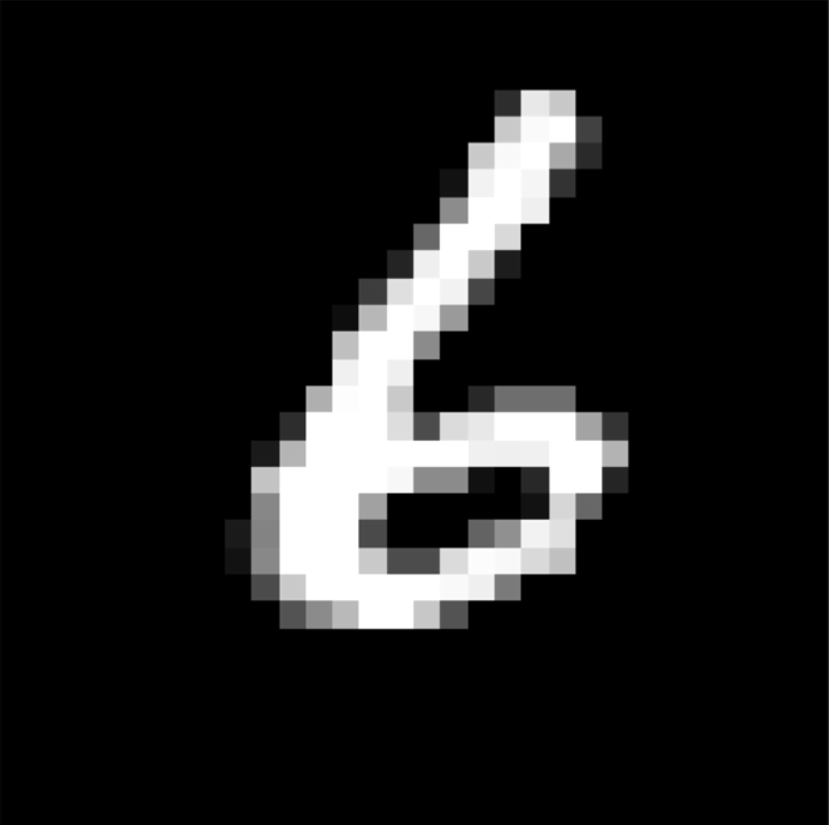

In [39]:
cv2_imshow(input_image)

In [40]:
input_image.shape

(825, 829, 3)

In [41]:
gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [42]:
gray.shape

(825, 829)

In [43]:
input_image_resized = cv2.resize(gray, (28,28))

In [44]:
input_image_resized.shape

(28, 28)

In [45]:
cv2_imshow(input_image_resized)

In [46]:
input_image_resized = input_image_resized/255

In [47]:
image_reshaped = np.reshape(input_image_resized, (1,28,28))

In [48]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[[2.2511940e-02 1.0867431e-02 9.8368567e-01 7.9531965e-05 4.1629678e-01
  1.4021618e-05 9.9970388e-01 3.4166211e-01 6.9711703e-09 4.2878978e-06]]


In [49]:
input_pred_label = np.argmax(input_prediction)

In [50]:
print(input_pred_label)

6


PREDICTIVE SYSTEM

Path of image to be predicted: /content/mnist_digit.png


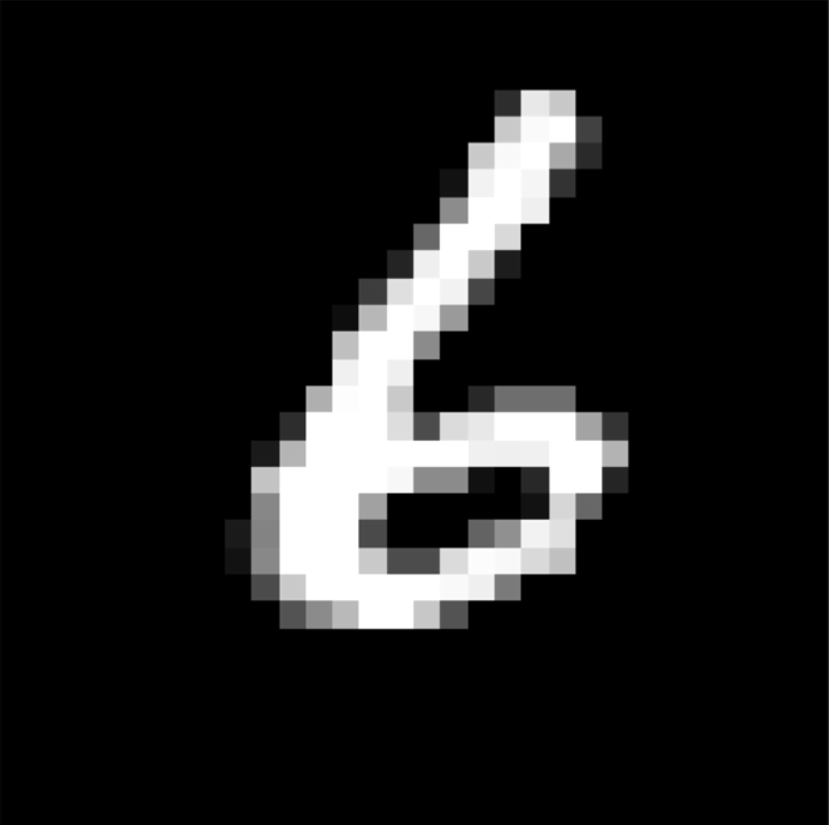

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The handwritten digit is recognised as  6


In [51]:
input_image_path = input('Path of image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(gray, (28,28))

cv2_imshow(input_image_resized)

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized, (1,28,28))

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognised as ',input_pred_label)